## Observations and Insights 

<p>The two most effective drugs seem to be Capomulin and Ramicane. All the other drugs seemed to be as effective as each other but they do not have as many time points as the previous mentioned drugs. This looks to be from the mice not making it to the end of the trial. </p>
<img src="TimepointBar.png" alt="Time Point Graph">

<p>The gender breakdown was almost down the middle. Another possible test to see is if gender plays a role in the effectiveness of each of the drugs in the study.</p>
<img src="GenderPie.png" alt= "Gender Breakdown">

<p>The 4 main drugs of interest seem to all have a very typical results. There are no outliers in three of the drugs. The only outlier 
   occuring in the drug Infubinol. Of the top two drugs Capomulin and Ramicane, Ramicane seems to have the lowest reduction in tumor size.</p>
<img src="BoxAndWhisker.png" alt= "Box And Whisker"

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_mousedata = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")


In [51]:
# Checking the number of mice in the DataFrame.
miceCount = len(full_mousedata["Mouse ID"].unique())
print(f"Mice Count: {miceCount}")

Mice Count: 249


In [52]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

full_mousedata["Duplicate"] = full_mousedata.duplicated(subset = ["Mouse ID", "Timepoint"])
dupMouseIds = full_mousedata["Mouse ID"].loc[full_mousedata.Duplicate == True]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupRows = full_mousedata.loc[full_mousedata.Duplicate == True]
dupRows



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mousedata = full_mousedata.loc[full_mousedata.Duplicate == False]
clean_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [53]:
# Checking the number of mice in the clean DataFrame.
cleanMiceCount = len(clean_mousedata["Mouse ID"].unique())
print(f"Clean Mouse Count: {cleanMiceCount}")

Clean Mouse Count: 249


In [7]:
## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugReg_grouped = clean_mousedata.groupby("Drug Regimen")

tVolMean = drugReg_grouped["Tumor Volume (mm3)"].mean()
tVolMedian = drugReg_grouped["Tumor Volume (mm3)"].median()
tVolVar = drugReg_grouped["Tumor Volume (mm3)"].var()
tVolStd = drugReg_grouped["Tumor Volume (mm3)"].std()
tVolSEM = drugReg_grouped["Tumor Volume (mm3)"].sem()

summary_data = pd.DataFrame({"Mean": tVolMean, "Median": tVolMedian,"Variance": tVolVar, 
                             "Standard Deviation": tVolStd, "SEM": tVolSEM})

summary_data
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drugStats = clean_mousedata.groupby('Drug Regimen').agg(Mean = ('Tumor Volume (mm3)',np.mean),
                                                        Median = ('Tumor Volume (mm3)', np.median), 
                                                        Variance = ('Tumor Volume (mm3)', np.var), 
                                                        Standard_Dev = ('Tumor Volume (mm3)', np.std), 
                                                        SEM = ('Tumor Volume (mm3)', st.sem)
                                                       )
drugStats


,Mean,Median,Variance,Standard_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
## Bar Plots

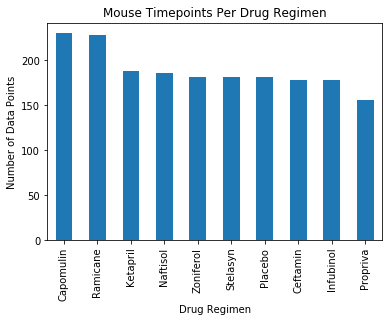

In [80]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
timepointCount = clean_mousedata["Drug Regimen"].value_counts()
timepointCount.plot(kind="bar", title="Mouse Timepoints Per Drug Regimen")

plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.savefig("TimepointBar.png")
plt.show()

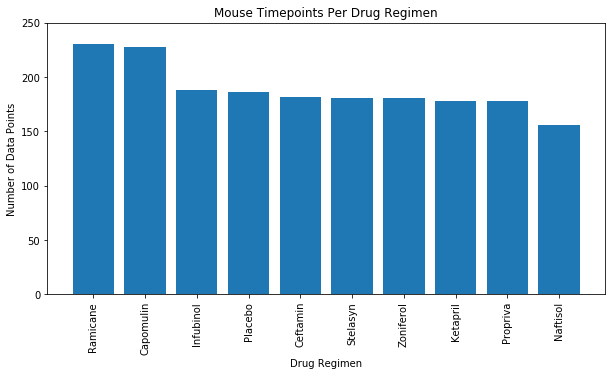

<Figure size 432x288 with 0 Axes>

In [76]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(timepointCount))
drugName = clean_mousedata["Drug Regimen"].unique()
drugCount = [x for x in timepointCount]
tickLocations = [x for x in x_axis]

plt.figure(figsize = (10,5))
fig1 = plt.bar(x_axis, drugCount, align="center")
plt.xticks(tickLocations,drugName, rotation="vertical")
plt.ylim(0,max(drugCount)+20)
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.title("Mouse Timepoints Per Drug Regimen")
plt.show()
plt.savefig("Timepoint.png")

## Pie Plots

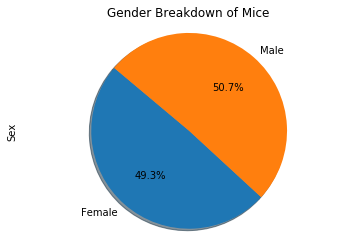

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_grouped = clean_mousedata.groupby("Sex")
genderCount = pd.DataFrame(gender_grouped["Sex"].count())

genderCount.plot(kind="pie",y="Sex", title="Gender Breakdown of Mice", legend=False, startangle=140, autopct="%1.1f%%",
                 shadow=True)
plt.axis("equal")
plt.savefig("GenderPie.png")
plt.show()



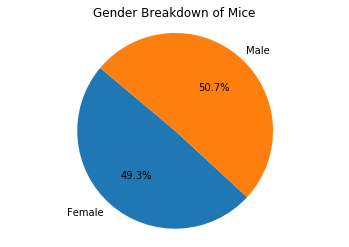

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = list(genderCount.index.values)
mouseCount = genderCount["Sex"]

plt.pie(mouseCount, labels=labels, startangle=140, autopct="%1.1f%%")
plt.title("Gender Breakdown of Mice")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin, Ramicane, Infubinol, and Ceftamin

drugList = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

bestDrugs = clean_mousedata[clean_mousedata["Drug Regimen"].isin(drugList)]
finalTumorSize = bestDrugs.groupby(["Drug Regimen","Mouse ID"]).last()["Tumor Volume (mm3)"]
finalTumorSize.head(50)

drugUnstack = finalTumorSize.unstack(level=0)

for x in drugList:
    quartiles = drugUnstack[x].quantile([0.25,0.5,0.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round(upperq-lowerq,2)
    
    print(x)
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")

    lowerBound = round(lowerq - (1.5*iqr),2)
    upperBound = round(upperq + (1.5*iqr),2)

    print(f"Values below {lowerBound} could be outliers.")
    print(f"Values above {upperBound} could be outliers.")
    print()



Capomulin
The lower quartile of tumor volume is: 32.38
The upper quartile of tumor volume: 40.16
The interquartile range of tumor volume is: 7.78
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.

Ramicane
The lower quartile of tumor volume is: 31.56
The upper quartile of tumor volume: 40.66
The interquartile range of tumor volume is: 9.1
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

Infubinol
The lower quartile of tumor volume is: 54.05
The upper quartile of tumor volume: 65.53
The interquartile range of tumor volume is: 11.48
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.

Ceftamin
The lower quartile of tumor volume is: 48.72
The upper quartile of tumor volume: 64.3
The interquartile range of tumor volume is: 15.58
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.



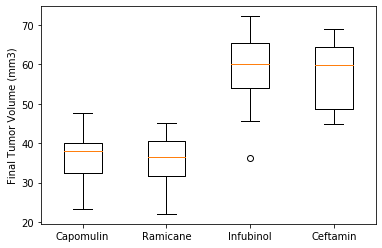

In [88]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drugPlotList = []

drugPlotList = [list(drugUnstack[x].dropna()) for x in drugList]
    
tick_locations = [1,2,3,4]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(drugPlotList)
plt.xticks(tick_locations,drugList)
plt.savefig("BoxAndWhisker.png")
plt.show()

## Line and Scatter Plots

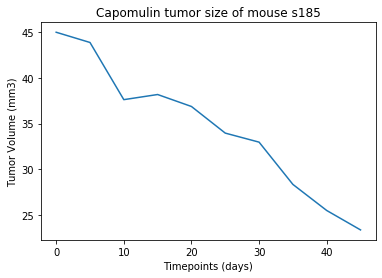

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capData = clean_mousedata.loc[clean_mousedata["Drug Regimen"] == "Capomulin"]
mouseData = capData.loc[capData["Mouse ID"] == "s185"]

plt.plot(mouseData["Timepoint"],mouseData["Tumor Volume (mm3)"])
plt.title("Capomulin tumor size of mouse s185")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoints (days)")
plt.show()



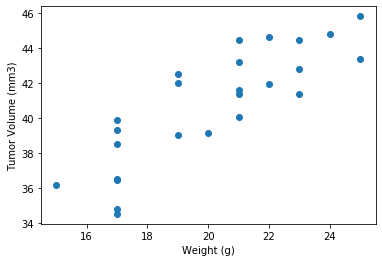

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouseGroup = capData.groupby("Mouse ID")

avgVol = mouseGroup["Tumor Volume (mm3)"].mean()
weight = mouseGroup["Weight (g)"].first()
tumor_df = pd.DataFrame({"Volume": avgVol, 
                         "Weight": weight})

plt.scatter(tumor_df["Weight"],tumor_df["Volume"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = tumor_df["Weight"]
vol = tumor_df["Volume"]

print(f"The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(weight,vol)[0],2)}")



The correlation coefficient between malic acid and flavanoids is 0.84


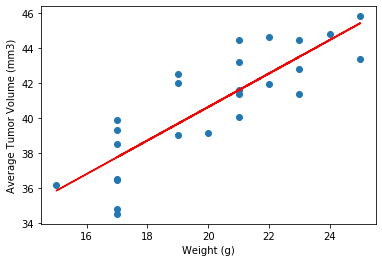

In [48]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,vol)
plt.plot(weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()